## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#create a separate table of mean, median, variance, std, and sem

# see after mean tables are created



In [7]:
#creates a table with mean value for each drug
tumor_mean = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().reset_index()
tumor_mean.rename(columns = {'Tumor Volume (mm3)': 'Mean Tumor'}, inplace = True)
tumor_mean.head()



,Drug Regimen,Mean Tumor
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565


In [8]:
#creates a table with median value for each drug
tumor_median = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().reset_index()
tumor_median.rename(columns = {'Tumor Volume (mm3)': 'Median Tumor'}, inplace = True)
tumor_median.head()

,Drug Regimen,Median Tumor
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285


In [9]:
tumor_var = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().reset_index()
tumor_var.rename(columns = {'Tumor Volume (mm3)': 'Var Tumor'}, inplace = True)
tumor_var.head()

,Drug Regimen,Var Tumor
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479


In [10]:
#creates a table with std value for each drug
tumor_std = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().reset_index()
tumor_std.rename(columns = {'Tumor Volume (mm3)': 'STD Tumor'}, inplace = True)
tumor_std.head()

,Drug Regimen,STD Tumor
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708


In [11]:
#creates a table with sem value for each drug
tumor_sem = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().reset_index()
tumor_sem.rename(columns = {'Tumor Volume (mm3)': 'SEM Tumor'}, inplace = True)
tumor_sem.head()

,Drug Regimen,SEM Tumor
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466


In [12]:
#merge all these into 1 table
summary_table = pd.merge(tumor_mean, tumor_median, how='outer', on='Drug Regimen')
summary_table = pd.merge(summary_table, tumor_var, how='outer', on='Drug Regimen')
summary_table = pd.merge(summary_table, tumor_std, how='outer', on='Drug Regimen')
summary_table = pd.merge(summary_table, tumor_sem, how='outer', on='Drug Regimen')
summary_table.set_index(['Drug Regimen'])

,Mean Tumor,Median Tumor,Var Tumor,STD Tumor,SEM Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


BAR PLOTS!!!!

<IPython.core.display.Javascript object>


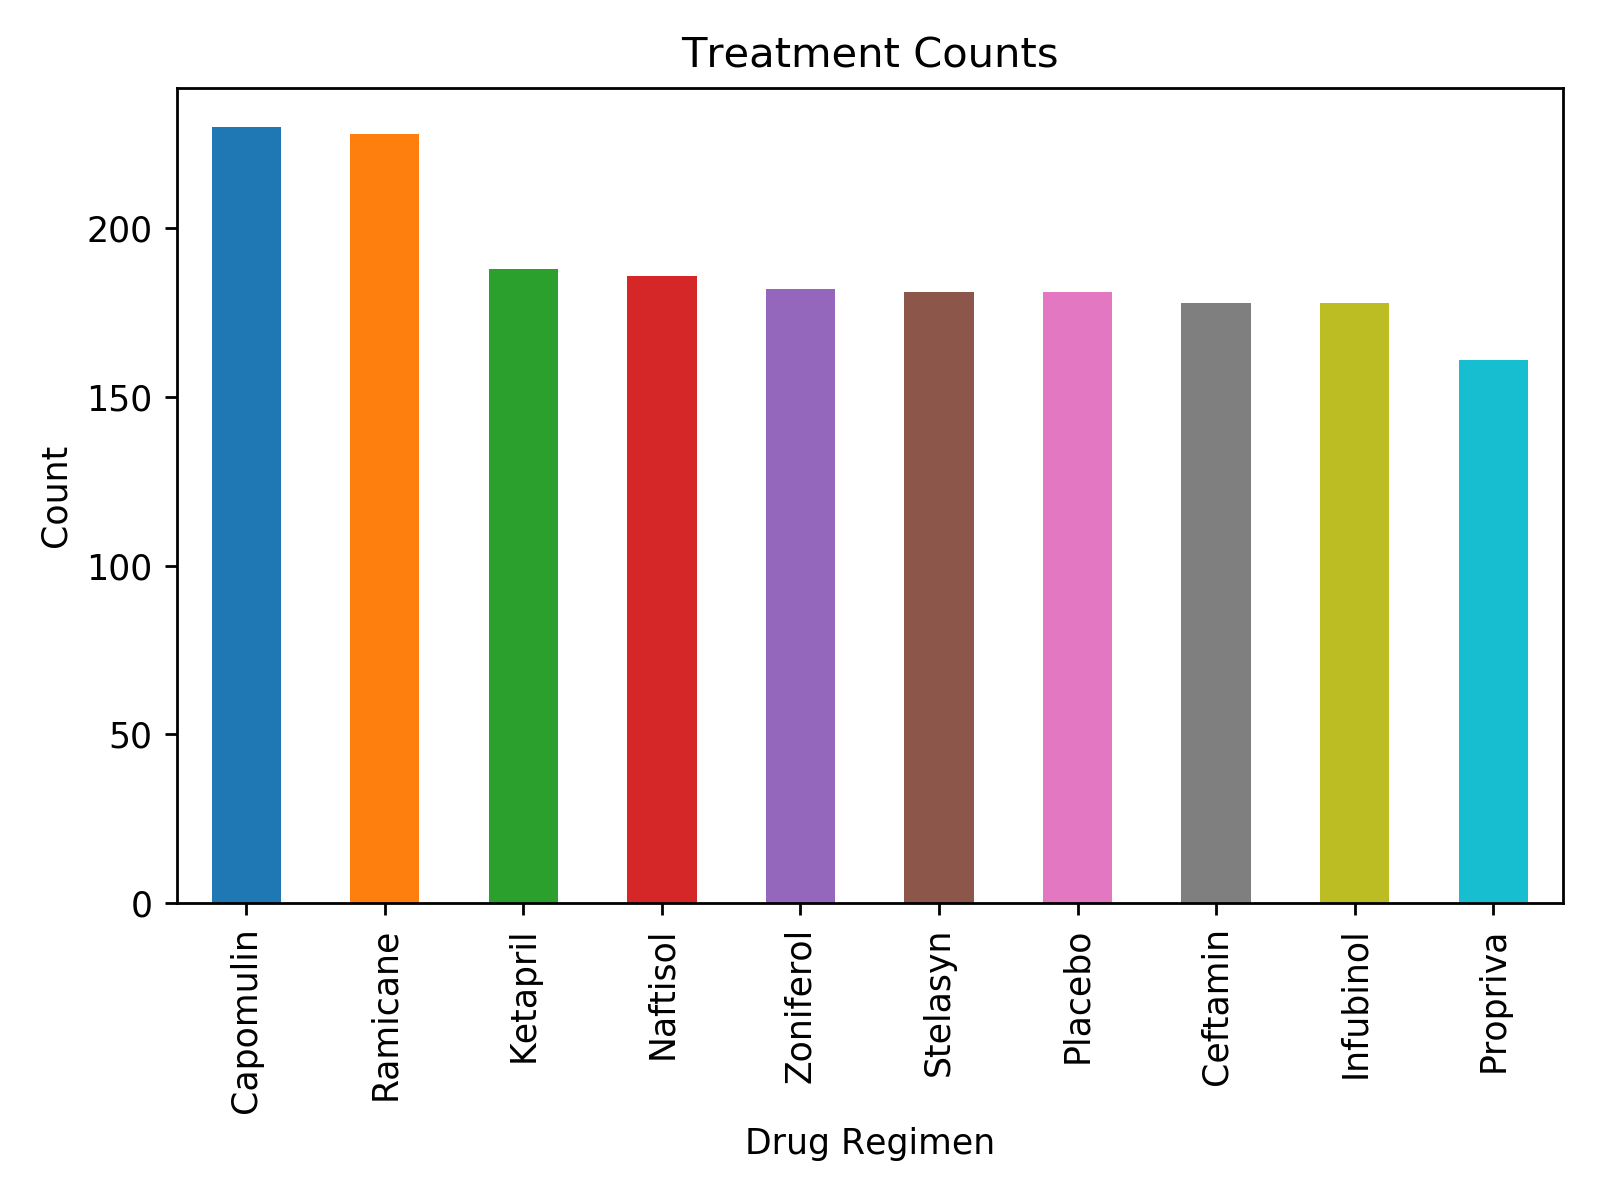

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_count = combined_data['Drug Regimen'].value_counts()
ax = drug_count.plot(kind = 'bar', color = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], title = 'Treatment Counts')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Count')
plt.tight_layout()



<IPython.core.display.Javascript object>


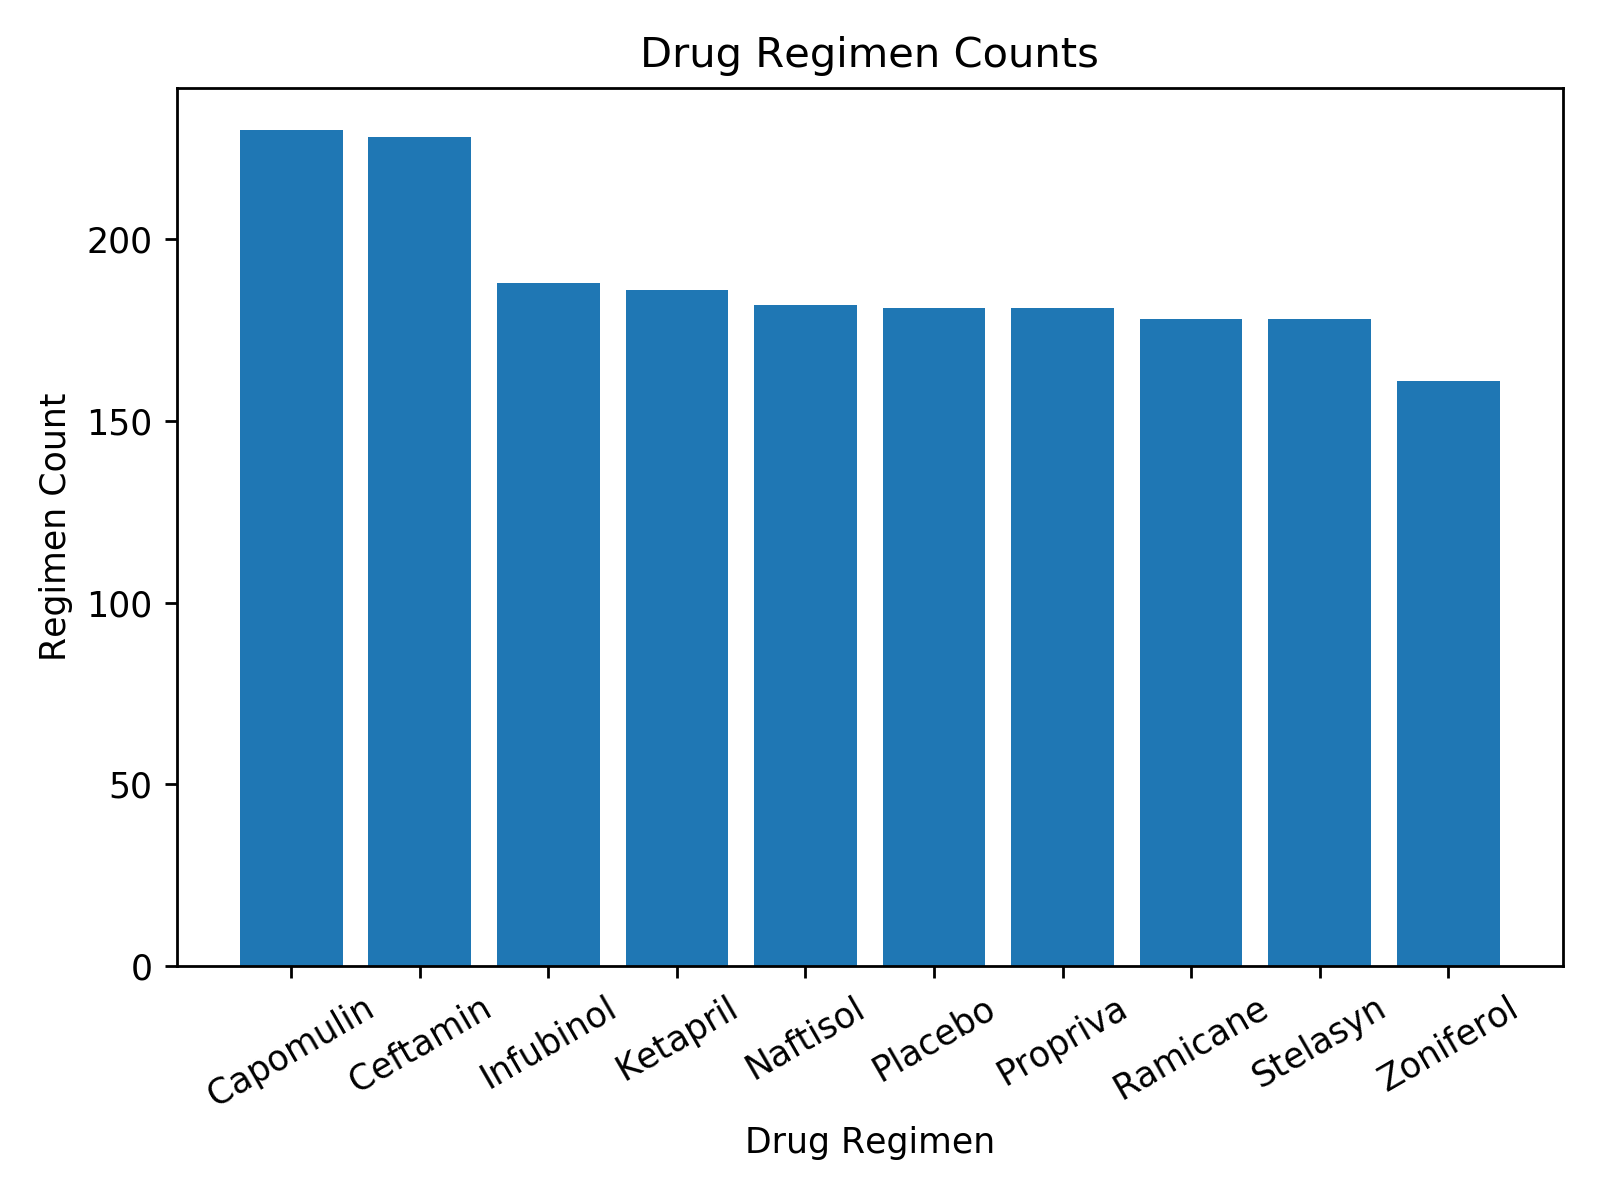

In [26]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x = summary_table['Drug Regimen']
y = combined_data['Drug Regimen'].value_counts()

plt.bar(x,y)
plt.xticks(rotation=30)
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Count")
plt.title("Drug Regimen Counts")
plt.tight_layout()

## Pie plots

<IPython.core.display.Javascript object>


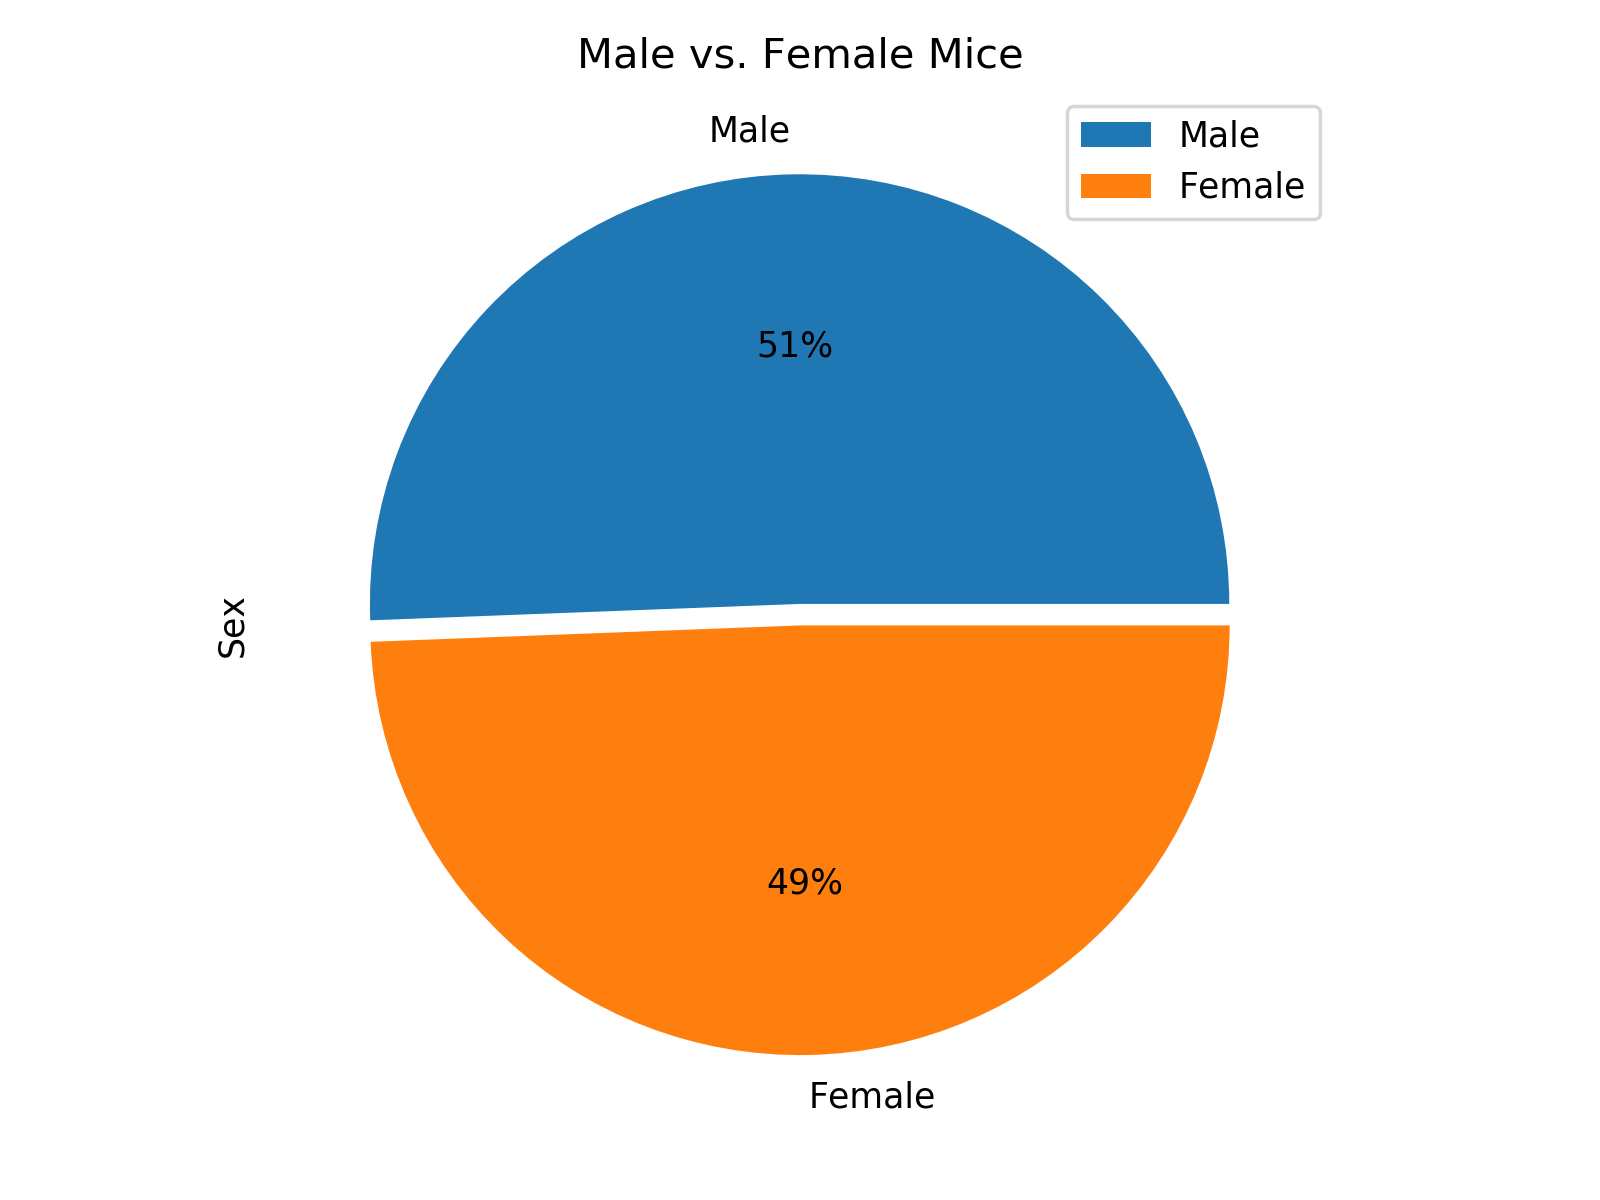

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_vs_female = combined_data['Sex'].value_counts()
male_vs_female
explode = [0.05, 0]
male_vs_female.plot(kind='pie', y='Sex', legend='best', autopct='%1.0f%%', title = 'Male vs. Female Mice', explode=explode)
plt.tight_layout()

<IPython.core.display.Javascript object>


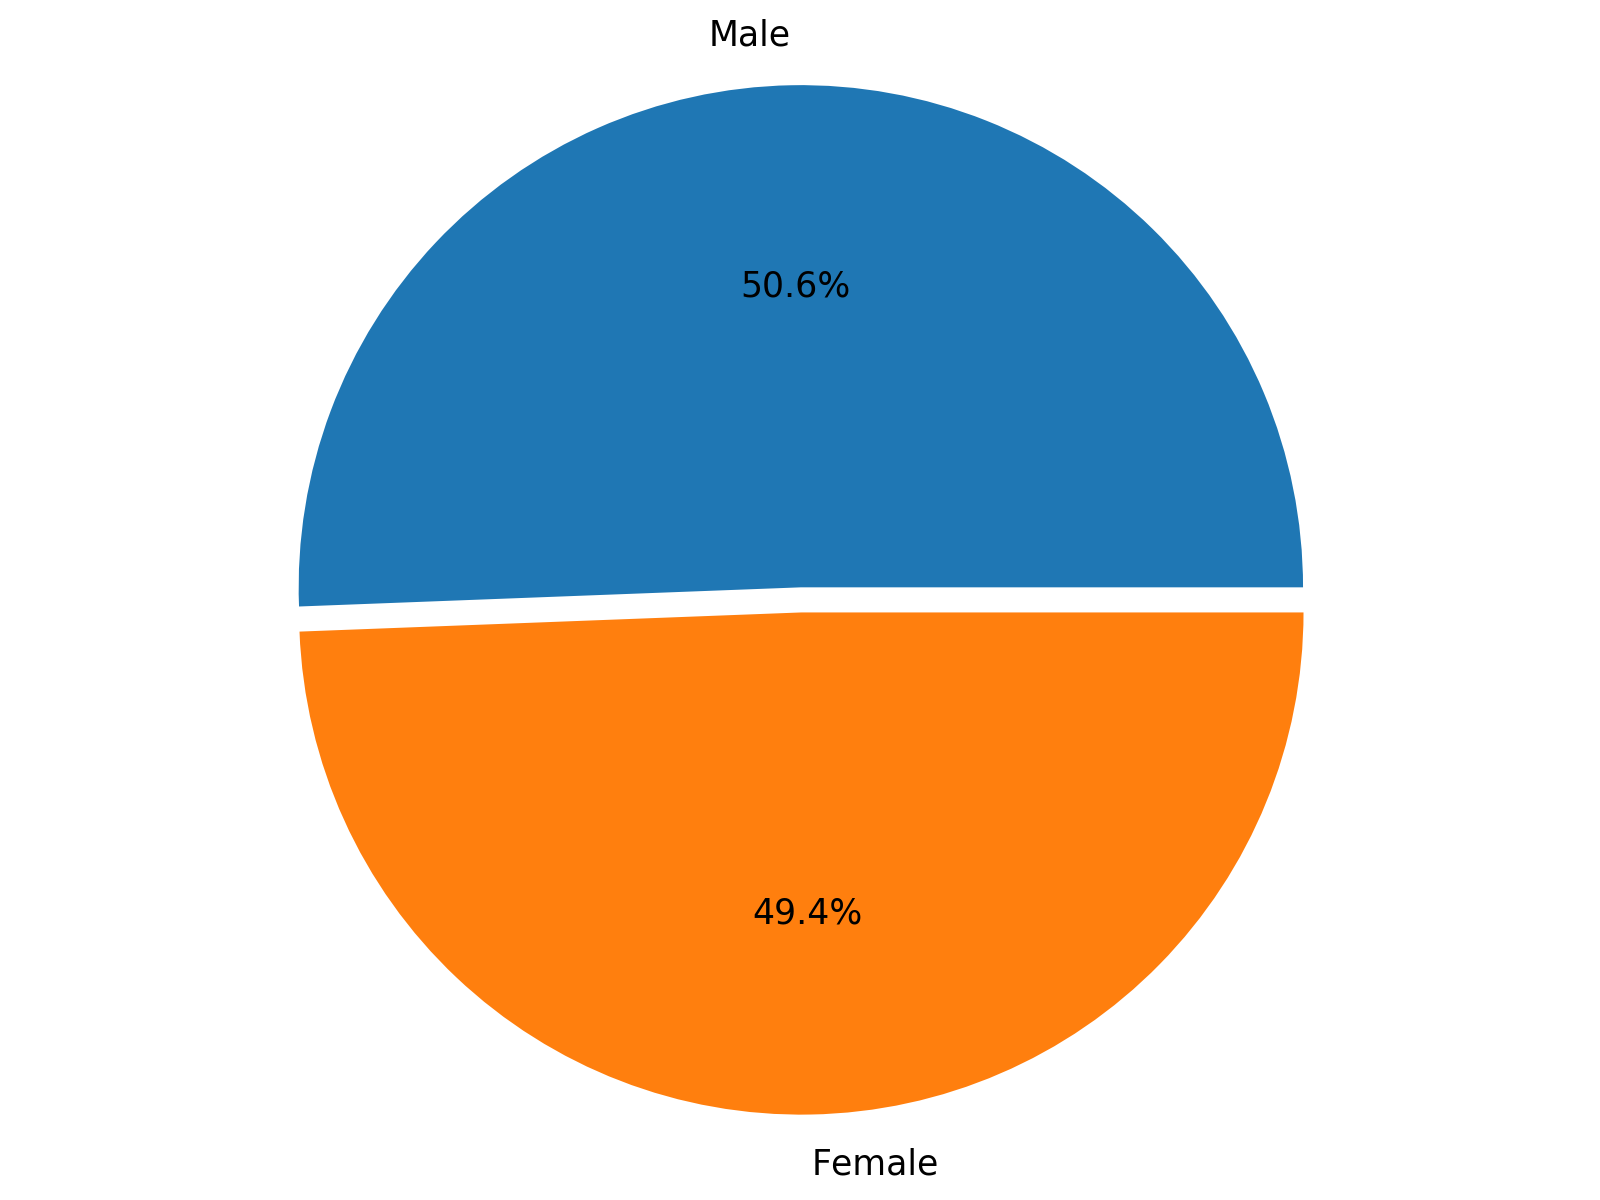

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Male", "Female"
sizes = len(combined_data.loc[combined_data['Sex']=='Male']), len(combined_data.loc[combined_data['Sex']=='Female'])
explode = [0.05, 0]
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

<IPython.core.display.Javascript object>


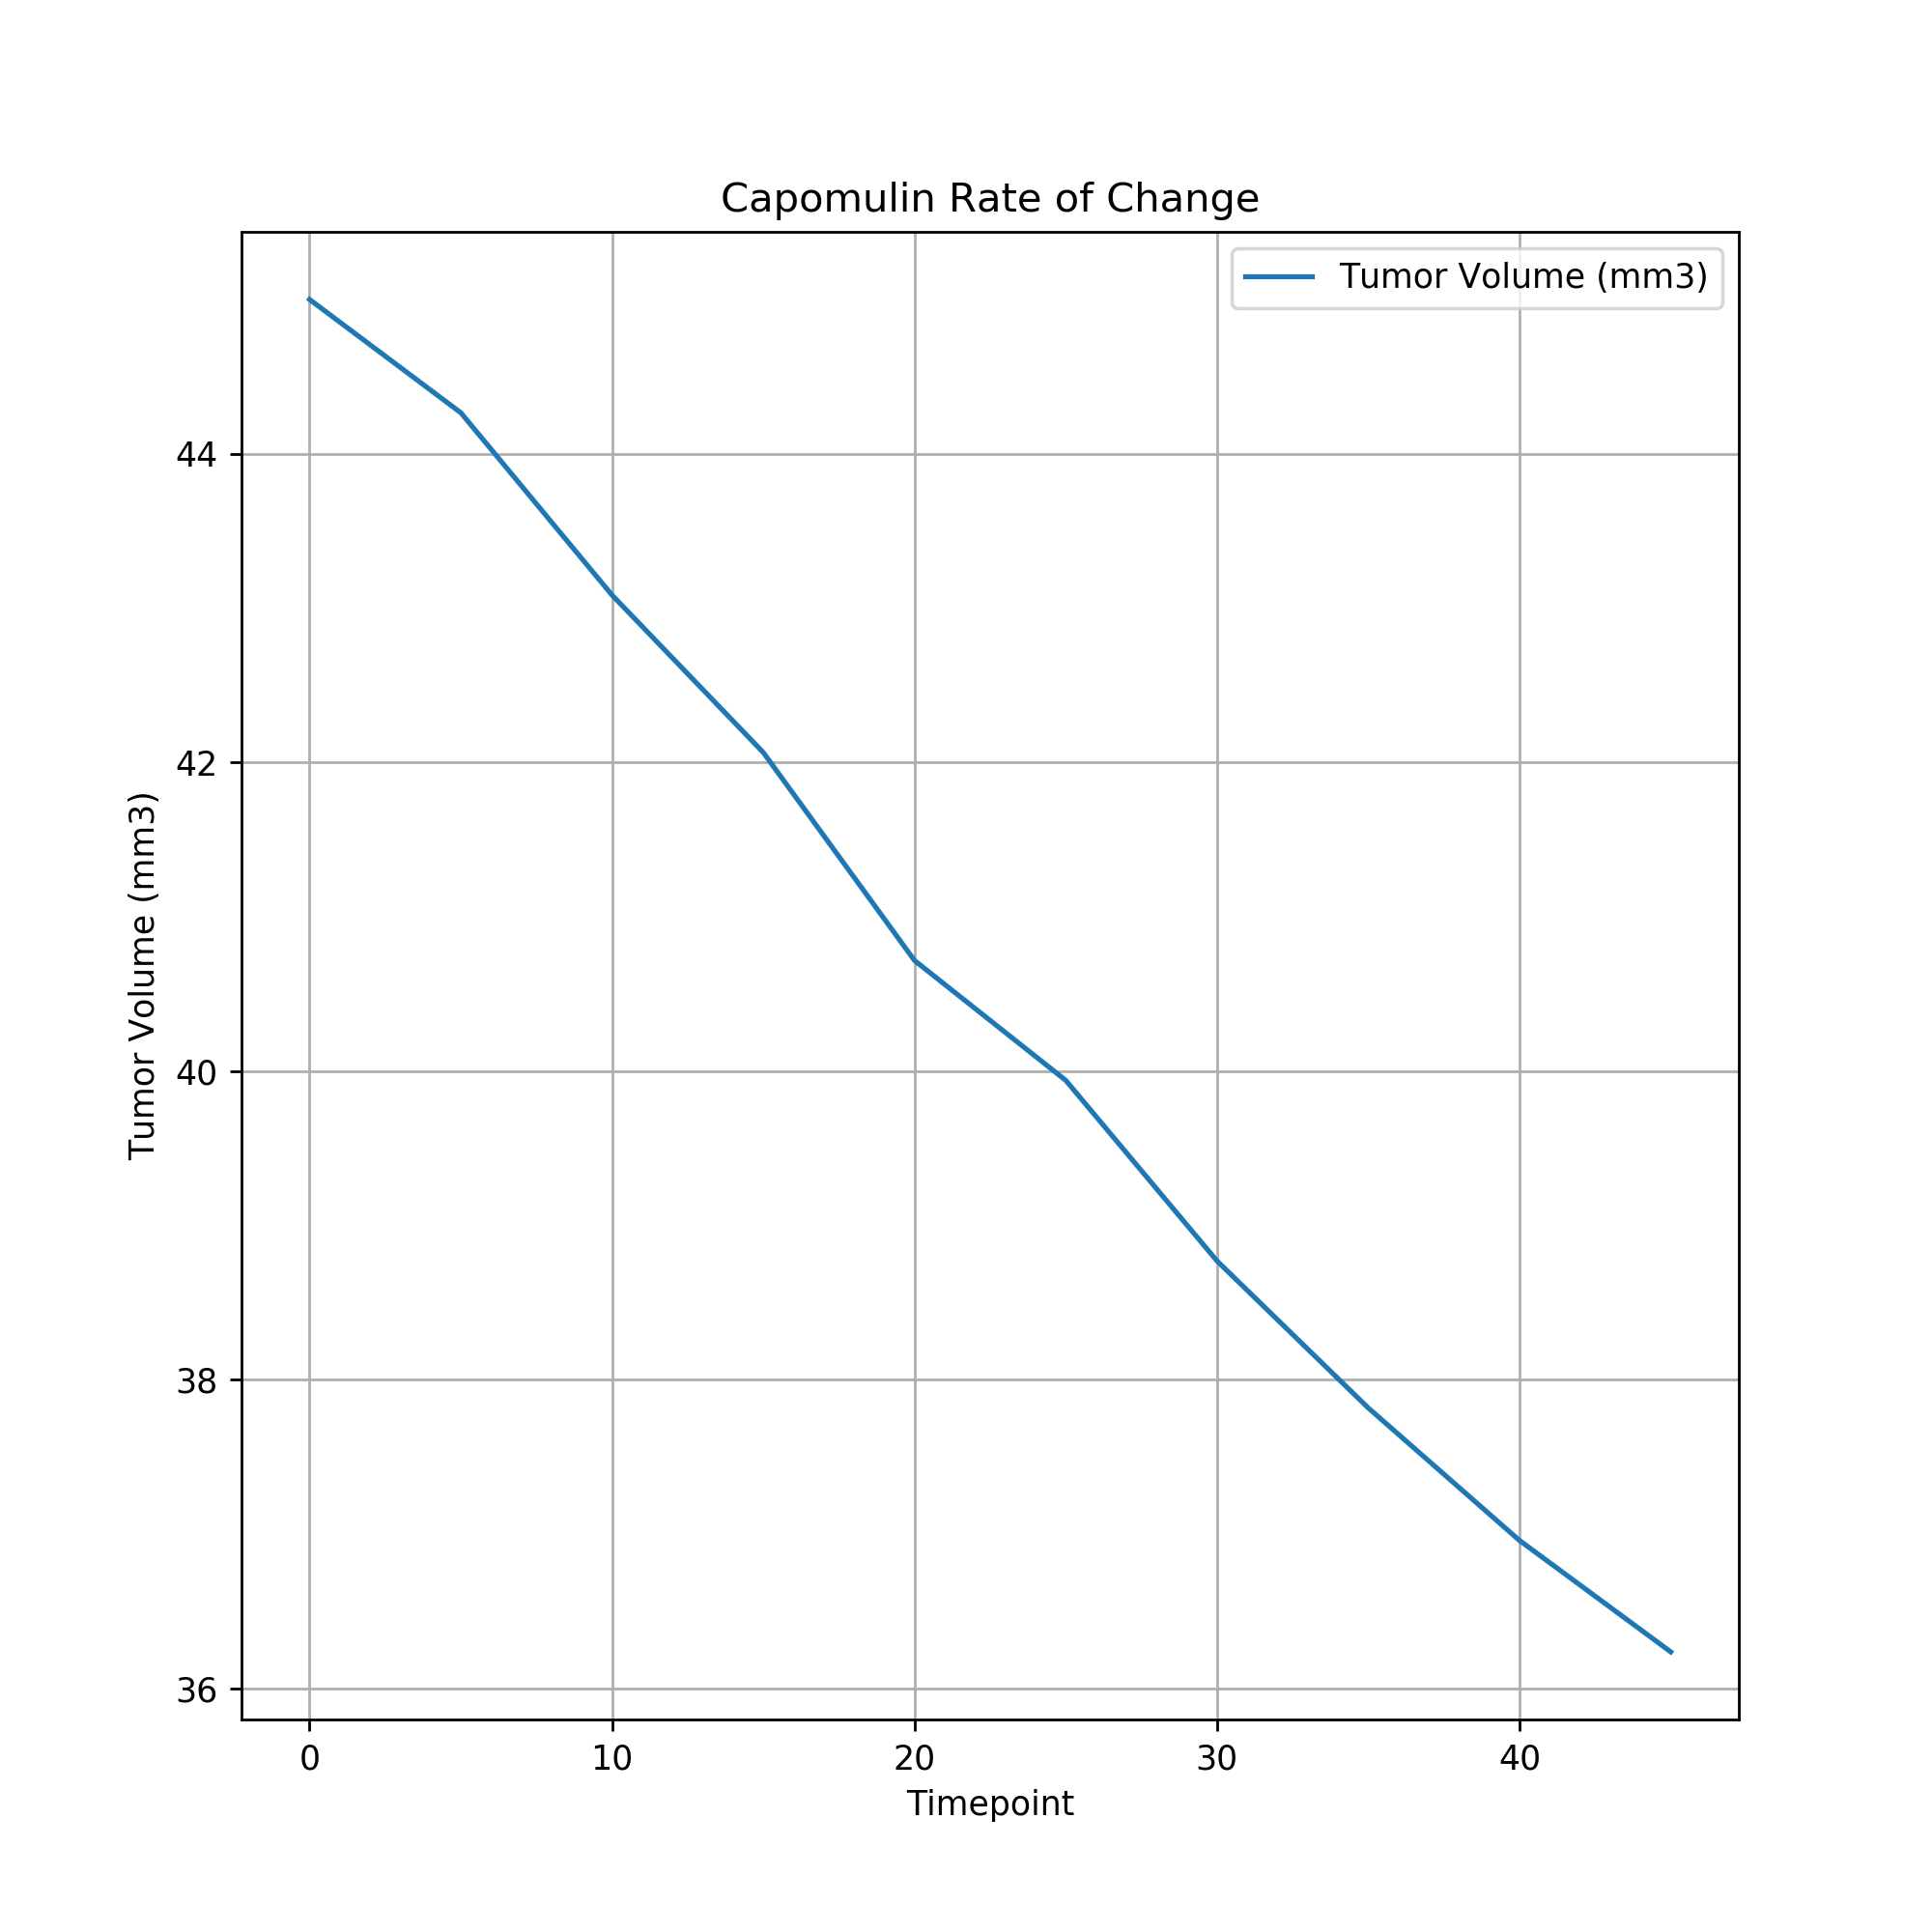

Text(0, 0.5, 'Tumor Volume (mm3)')

In [76]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combined_mean = combined_data.groupby(["Drug Regimen", "Timepoint"]).mean()
#combined_mean = combined_mean.loc[combined_mean['Drug Regimen'] == 'Capomulin']
combined_mean
combined_mean.reset_index(level = None, inplace = True)
combined_mean
Capomulin_Data = combined_mean.loc[combined_mean['Drug Regimen'] == 'Capomulin']

Capomulin_Data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin Rate of Change")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')



<IPython.core.display.Javascript object>


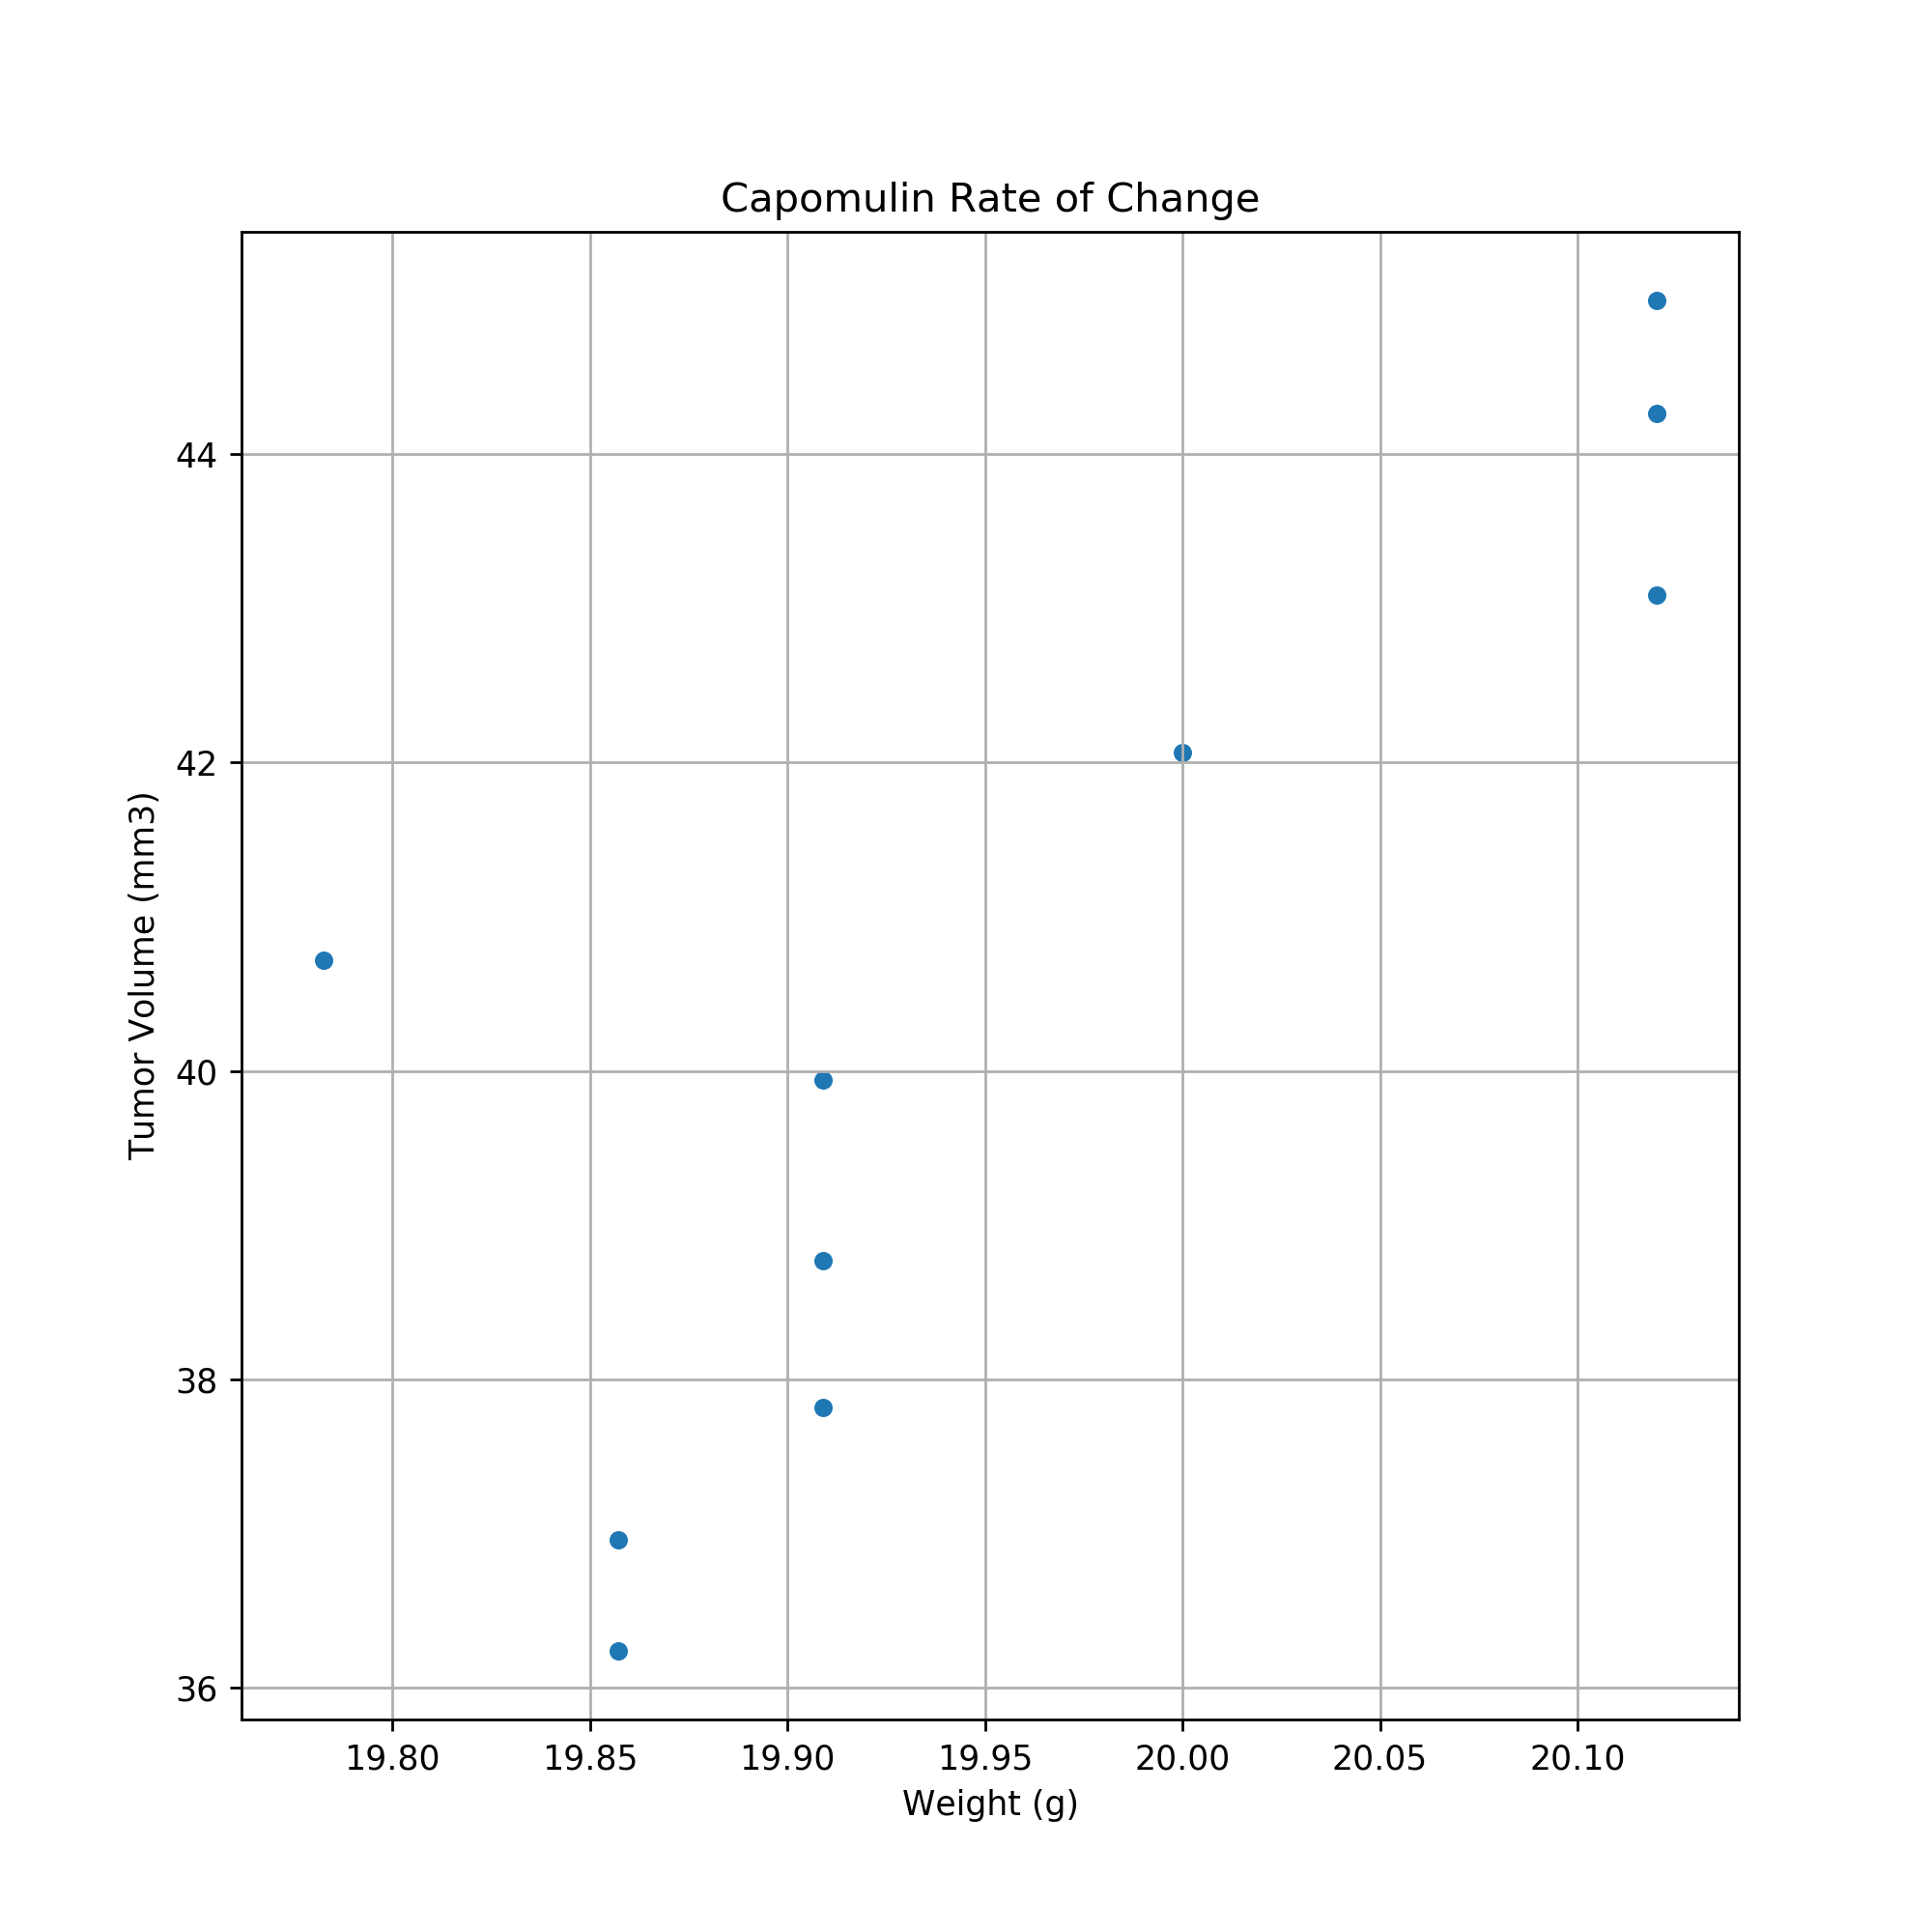

Text(0, 0.5, 'Tumor Volume (mm3)')

In [79]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_Data
Capomulin_Data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin Rate of Change")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen